In [1]:
import pandas as pd
import sklearn.datasets as datasets
import numpy as np

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
boston = datasets.load_boston()

In [3]:
boston_df = pd.DataFrame(boston.data, columns = boston["feature_names"])

In [4]:
boston_df['target'] = boston['target']

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

<AxesSubplot:>

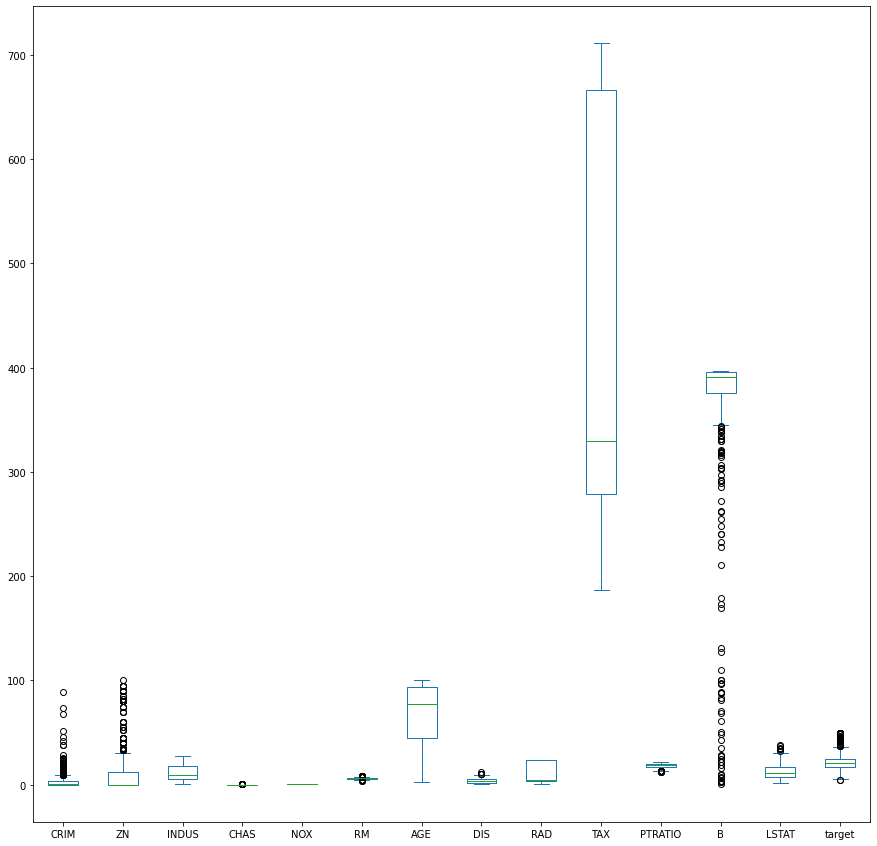

In [7]:
boston_df.plot(kind='box', figsize=(15,15))

In [8]:
def remove_outlier(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3-Q1
    lower = Q1-1.5*iqr
    upper = Q3 + 1.5*iqr
    data[col] = np.clip(data[col],lower,upper)
    return data

def treat_outliers(data, cols):
    for col in cols:
        data1 = remove_outlier(data, col)
    return data1

In [9]:
treat_outliers(boston_df, boston_df.iloc[:,0::])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:>

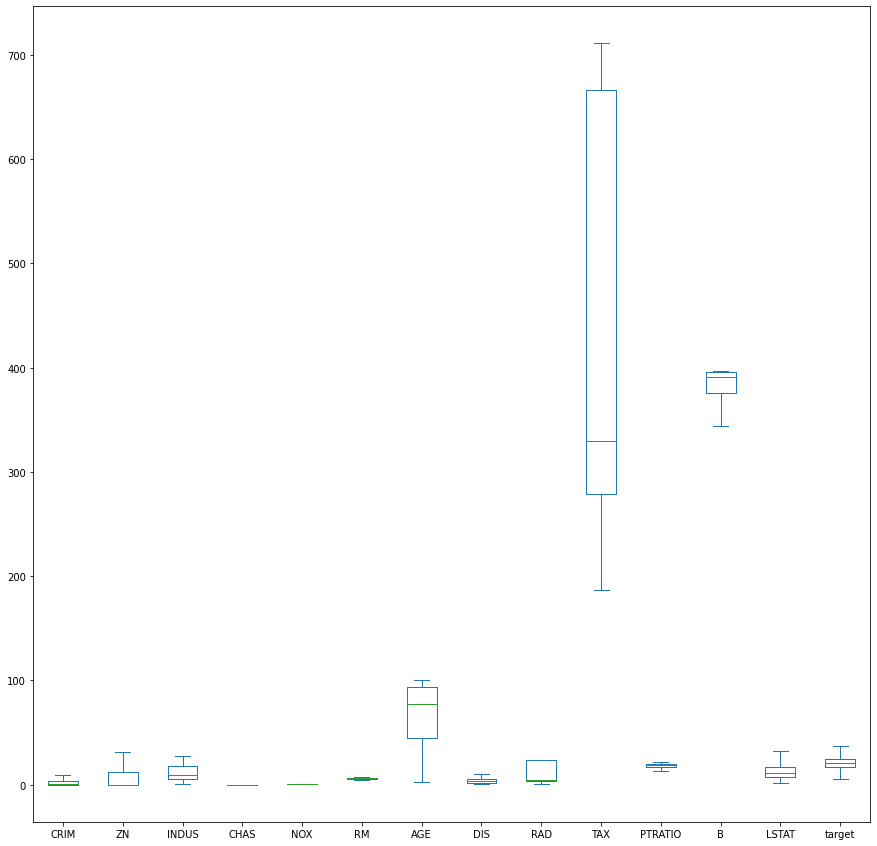

In [10]:
boston_df.plot(kind='box', figsize=(15,15))

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()
X = boston_df.drop('target', axis=1)
y = boston_df['target']

In [14]:
columns = list(X.columns)

In [15]:
columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [16]:
type(columns)

list

In [17]:
X[columns] = scaler.fit_transform(X[columns])

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(13,),activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(1,activation='relu')
])

In [29]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

In [30]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 1s 21ms/step - loss: 22.1626 - mean_absolute_error: 22.1626 - val_loss: 21.5536 - val_mean_absolute_error: 21.5536
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 22.1081 - mean_absolute_error: 22.1081 - val_loss: 21.4803 - val_mean_absolute_error: 21.4803
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 22.0065 - mean_absolute_error: 22.0065 - val_loss: 21.3190 - val_mean_absolute_error: 21.3190
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 21.8105 - mean_absolute_error: 21.8105 - val_loss: 21.0859 - val_mean_absolute_error: 21.0859
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 21.5675 - mean_absolute_error: 21.5675 - val_loss: 20.8338 - val_mean_absolute_error: 20.8338
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 21.3027 - mean_absolute_error: 21.3027 - val_loss: 20.5507 - val_mean_absolute_error: 20.55

In [22]:
model_1 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(13,),activation='linear'),
    keras.layers.Dense(26,activation='linear'),
    keras.layers.Dense(1,activation='linear')
])
model_1.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])
model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 22.1546 - mean_absolute_error: 22.1546 - val_loss: 21.5009 - val_mean_absolute_error: 21.5009
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 21.9583 - mean_absolute_error: 21.9583 - val_loss: 21.3328 - val_mean_absolute_error: 21.3328
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 21.7686 - mean_absolute_error: 21.7686 - val_loss: 21.1478 - val_mean_absolute_error: 21.1478
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 21.5566 - mean_absolute_error: 21.5566 - val_loss: 20.9373 - val_mean_absolute_error: 20.9373
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 21.3209 - mean_absolute_error: 21.3209 - val_loss: 20.6987 - val_mean_absolute_error: 20.6987
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 21.0539 - mean_absolute_error: 21.0539 - val_loss: 20.4127 - val_mean_absolute_error: 20.41

In [31]:
result = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 2.0787 - mean_absolute_error: 2.0787


In [32]:
result

[2.0786871910095215, 2.0786871910095215]

In [33]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [34]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

In [35]:
score

0.8160357806724825